In [24]:
import os
import subprocess
import shutil
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
import shutil
# from google.colab.patches import cv2_imshow
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

In [25]:
import os
import wget

In [26]:
!wget -O data.zip https://www.dropbox.com/scl/fi/vtz4gv8cg9txdvs6pkp5y/data.zip?rlkey=ujivmhh9dlnklqz0yuqbl0tz3&dl=0

In [26]:
zip_file_path = wget.download('https://www.dropbox.com/scl/fi/vtz4gv8cg9txdvs6pkp5y/data.zip?rlkey=ujivmhh9dlnklqz0yuqbl0tz3&dl=1')

KeyboardInterrupt: 

In [39]:
import zipfile

# Path to the zip file
zip_file_path = "data.zip"

# Directory to extract the contents
extract_dir = "./"

# Open the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    # Extract all the contents into the specified directory
    zip_ref.extractall(extract_dir)

print("Extraction complete.")

Extraction complete.


In [2]:
dataset_directory = 'data'

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
BATCH_SIZE = 64 # adjust to your needs
IMG_SHAPE  = 224  # adjust to your needs

train_data_generator = ImageDataGenerator(
            rescale=1./255,
            shear_range=0.2,
            zoom_range=0.3,
            horizontal_flip=True)

test_data_generator = ImageDataGenerator(rescale=1./255)

train_data = train_data_generator.flow_from_directory(
    dataset_directory+'/train',
    target_size=(IMG_SHAPE, IMG_SHAPE),
    color_mode='grayscale',
    batch_size=BATCH_SIZE)

val_data = test_data_generator.flow_from_directory(
    dataset_directory+'/validate',
    target_size=(IMG_SHAPE, IMG_SHAPE),
    color_mode='grayscale',
    batch_size=BATCH_SIZE)

test_data = test_data_generator.flow_from_directory(
    dataset_directory+'/test',
    target_size=(IMG_SHAPE, IMG_SHAPE),
    color_mode='grayscale',
    batch_size=BATCH_SIZE)

Found 25010 images belonging to 4 classes.
Found 5356 images belonging to 4 classes.
Found 5362 images belonging to 4 classes.


In [29]:

from tensorflow import keras
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [44]:
"""BUILDING A CONVOLUTIONAL NEURAL NETWORK"""

from tensorflow import keras
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

number_of_classes = train_data.num_classes

model = keras.Sequential() #stack all the layers
# Convolutional layer block 1
model.add(keras.layers.Conv2D(32, kernel_size=(3,3), input_shape=(IMG_SHAPE, IMG_SHAPE, 1), padding='same'))
model.add(keras.layers.BatchNormalization())  # Batch Normalization layer
model.add(keras.layers.Activation('relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2))) #maxpol: resize img
#detect features -> increase 32-64-128

# Convolutional layer block 2
model.add(keras.layers.Conv2D(64, kernel_size=(3,3), padding='same'))
model.add(keras.layers.BatchNormalization())  # Batch Normalization layer
model.add(keras.layers.Activation('relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

# Convolutional layer block 3
model.add(keras.layers.Conv2D(128, kernel_size=(3,3), padding='same'))
model.add(keras.layers.BatchNormalization())  # Batch Normalization layer
model.add(keras.layers.Activation('relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

# Flattening the layers to feed into a DNN
model.add(keras.layers.Flatten())

# Dense layer with Batch Normalization
model.add(keras.layers.Dense(1024)) #cal probability
model.add(keras.layers.BatchNormalization())  # Batch Normalization layer
model.add(keras.layers.Activation('relu'))

# Dropout layer to reduce overfitting
model.add(keras.layers.Dropout(0.3))

# model.add(keras.layers.Dense(64, activation='relu'))
# model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(number_of_classes, activation='softmax')) 
 #sigmoid is use mainly in binary classification => softmax is used for multi-classifictions

#compile the neural network
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model_checkpoint = ModelCheckpoint('best_model.keras',
                                    save_best_only=True, 
                                    monitor='val_loss', 
                                    verbose =1)
# model = keras.models.load_model('best_model.keras')

early_stopping = EarlyStopping(monitor='val_loss', patience=10)
#training the neural network
history = model.fit(train_data, 
                    validation_data=val_data,
                    epochs = 30, 
                    shuffle=True,
                    batch_size=BATCH_SIZE,
                    callbacks=[early_stopping, model_checkpoint]
                    )

Epoch 1/30
391/391 [==============================] - ETA: 0s - loss: 1.1022 - accuracy: 0.5465
Epoch 1: val_loss improved from inf to 1.51016, saving model to best_model.keras
391/391 [==============================] - 85s 200ms/step - loss: 1.1022 - accuracy: 0.5465 - val_loss: 1.5102 - val_accuracy: 0.4212
Epoch 2/30
391/391 [==============================] - ETA: 0s - loss: 0.6381 - accuracy: 0.7397
Epoch 2: val_loss improved from 1.51016 to 1.28126, saving model to best_model.keras
391/391 [==============================] - 58s 148ms/step - loss: 0.6381 - accuracy: 0.7397 - val_loss: 1.2813 - val_accuracy: 0.5106
Epoch 3/30
391/391 [==============================] - ETA: 0s - loss: 0.4745 - accuracy: 0.8139
Epoch 3: val_loss improved from 1.28126 to 0.59323, saving model to best_model.keras
391/391 [==============================] - 57s 145ms/step - loss: 0.4745 - accuracy: 0.8139 - val_loss: 0.5932 - val_accuracy: 0.7634
Epoch 4/30
391/391 [==============================] - ETA: 

In [13]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 224, 224, 32)      320       
                                                                 
 batch_normalization_4 (Bat  (None, 224, 224, 32)      128       
 chNormalization)                                                
                                                                 
 activation_4 (Activation)   (None, 224, 224, 32)      0         
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 112, 112, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 112, 112, 64)      18496     
                                                                 
 batch_normalization_5 (Bat  (None, 112, 112, 64)     

In [28]:
from tensorflow.keras.utils import plot_model

plot_model(model, to_file='model_architecture.png', show_shapes=True)


You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [8]:
"""MODEL EVALUATION"""
from tensorflow import keras
model = keras.models.load_model('best_model.keras')

loss, accuracy = model.evaluate(test_data)
print("Test Accuracy = ", accuracy)


2024-04-17 16:18:24.332656: W external/local_tsl/tsl/framework/bfc_allocator.cc:296] Allocator (GPU_0_bfc) ran out of memory trying to allocate 408.00MiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2024-04-17 16:18:24.332700: W tensorflow/core/kernels/gpu_utils.cc:54] Failed to allocate memory for convolution redzone checking; skipping this check. This is benign and only means that we won't check cudnn for out-of-bounds reads and writes. This message will only be printed once.
2024-04-17 16:18:24.750563: W external/local_tsl/tsl/framework/bfc_allocator.cc:296] Allocator (GPU_0_bfc) ran out of memory trying to allocate 457.00MiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2024-04-17 16:18:24.786311: W external/local_tsl/tsl/framework/bfc_allocator.cc:296] Alloc

ResourceExhaustedError: Graph execution error:

Detected at node sequential_1/batch_normalization_4/FusedBatchNormV3 defined at (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main

  File "<frozen runpy>", line 88, in _run_code

  File "/home/huyenanh/miniconda3/envs/tf/lib/python3.11/site-packages/ipykernel_launcher.py", line 18, in <module>

  File "/home/huyenanh/miniconda3/envs/tf/lib/python3.11/site-packages/traitlets/config/application.py", line 1075, in launch_instance

  File "/home/huyenanh/miniconda3/envs/tf/lib/python3.11/site-packages/ipykernel/kernelapp.py", line 739, in start

  File "/home/huyenanh/miniconda3/envs/tf/lib/python3.11/site-packages/tornado/platform/asyncio.py", line 205, in start

  File "/home/huyenanh/miniconda3/envs/tf/lib/python3.11/asyncio/base_events.py", line 608, in run_forever

  File "/home/huyenanh/miniconda3/envs/tf/lib/python3.11/asyncio/base_events.py", line 1936, in _run_once

  File "/home/huyenanh/miniconda3/envs/tf/lib/python3.11/asyncio/events.py", line 84, in _run

  File "/home/huyenanh/miniconda3/envs/tf/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 545, in dispatch_queue

  File "/home/huyenanh/miniconda3/envs/tf/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 534, in process_one

  File "/home/huyenanh/miniconda3/envs/tf/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 437, in dispatch_shell

  File "/home/huyenanh/miniconda3/envs/tf/lib/python3.11/site-packages/ipykernel/ipkernel.py", line 359, in execute_request

  File "/home/huyenanh/miniconda3/envs/tf/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 778, in execute_request

  File "/home/huyenanh/miniconda3/envs/tf/lib/python3.11/site-packages/ipykernel/ipkernel.py", line 446, in do_execute

  File "/home/huyenanh/miniconda3/envs/tf/lib/python3.11/site-packages/ipykernel/zmqshell.py", line 549, in run_cell

  File "/home/huyenanh/miniconda3/envs/tf/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3075, in run_cell

  File "/home/huyenanh/miniconda3/envs/tf/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3130, in _run_cell

  File "/home/huyenanh/miniconda3/envs/tf/lib/python3.11/site-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner

  File "/home/huyenanh/miniconda3/envs/tf/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3334, in run_cell_async

  File "/home/huyenanh/miniconda3/envs/tf/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3517, in run_ast_nodes

  File "/home/huyenanh/miniconda3/envs/tf/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3577, in run_code

  File "/tmp/ipykernel_2914721/3621989287.py", line 5, in <module>

  File "/home/huyenanh/miniconda3/envs/tf/lib/python3.11/site-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/home/huyenanh/miniconda3/envs/tf/lib/python3.11/site-packages/keras/src/engine/training.py", line 2296, in evaluate

  File "/home/huyenanh/miniconda3/envs/tf/lib/python3.11/site-packages/keras/src/engine/training.py", line 4108, in run_step

  File "/home/huyenanh/miniconda3/envs/tf/lib/python3.11/site-packages/keras/src/engine/training.py", line 2066, in test_function

  File "/home/huyenanh/miniconda3/envs/tf/lib/python3.11/site-packages/keras/src/engine/training.py", line 2049, in step_function

  File "/home/huyenanh/miniconda3/envs/tf/lib/python3.11/site-packages/keras/src/engine/training.py", line 2037, in run_step

  File "/home/huyenanh/miniconda3/envs/tf/lib/python3.11/site-packages/keras/src/engine/training.py", line 1917, in test_step

  File "/home/huyenanh/miniconda3/envs/tf/lib/python3.11/site-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/home/huyenanh/miniconda3/envs/tf/lib/python3.11/site-packages/keras/src/engine/training.py", line 590, in __call__

  File "/home/huyenanh/miniconda3/envs/tf/lib/python3.11/site-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/home/huyenanh/miniconda3/envs/tf/lib/python3.11/site-packages/keras/src/engine/base_layer.py", line 1149, in __call__

  File "/home/huyenanh/miniconda3/envs/tf/lib/python3.11/site-packages/keras/src/utils/traceback_utils.py", line 96, in error_handler

  File "/home/huyenanh/miniconda3/envs/tf/lib/python3.11/site-packages/keras/src/engine/sequential.py", line 398, in call

  File "/home/huyenanh/miniconda3/envs/tf/lib/python3.11/site-packages/keras/src/engine/functional.py", line 515, in call

  File "/home/huyenanh/miniconda3/envs/tf/lib/python3.11/site-packages/keras/src/engine/functional.py", line 672, in _run_internal_graph

  File "/home/huyenanh/miniconda3/envs/tf/lib/python3.11/site-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/home/huyenanh/miniconda3/envs/tf/lib/python3.11/site-packages/keras/src/engine/base_layer.py", line 1149, in __call__

  File "/home/huyenanh/miniconda3/envs/tf/lib/python3.11/site-packages/keras/src/utils/traceback_utils.py", line 96, in error_handler

  File "/home/huyenanh/miniconda3/envs/tf/lib/python3.11/site-packages/keras/src/layers/normalization/batch_normalization.py", line 597, in call

  File "/home/huyenanh/miniconda3/envs/tf/lib/python3.11/site-packages/keras/src/layers/normalization/batch_normalization.py", line 990, in _fused_batch_norm

  File "/home/huyenanh/miniconda3/envs/tf/lib/python3.11/site-packages/keras/src/utils/control_flow_util.py", line 108, in smart_cond

  File "/home/huyenanh/miniconda3/envs/tf/lib/python3.11/site-packages/keras/src/layers/normalization/batch_normalization.py", line 979, in _fused_batch_norm_inference

OOM when allocating tensor with shape[64,224,224,32] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[{{node sequential_1/batch_normalization_4/FusedBatchNormV3}}]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info. This isn't available when running in Eager mode.
 [Op:__inference_test_function_3283]

In [ ]:
"""MODEL EVALUATION"""

loss, accuracy = model.evaluate(test_data)
print("Test Accuracy = ", accuracy)


84/84 [==============================] - 3s 36ms/step - loss: 0.2510 - accuracy: 0.9161
Test Accuracy =  0.9160760641098022


84/84 [==============================] - 3s 31ms/step


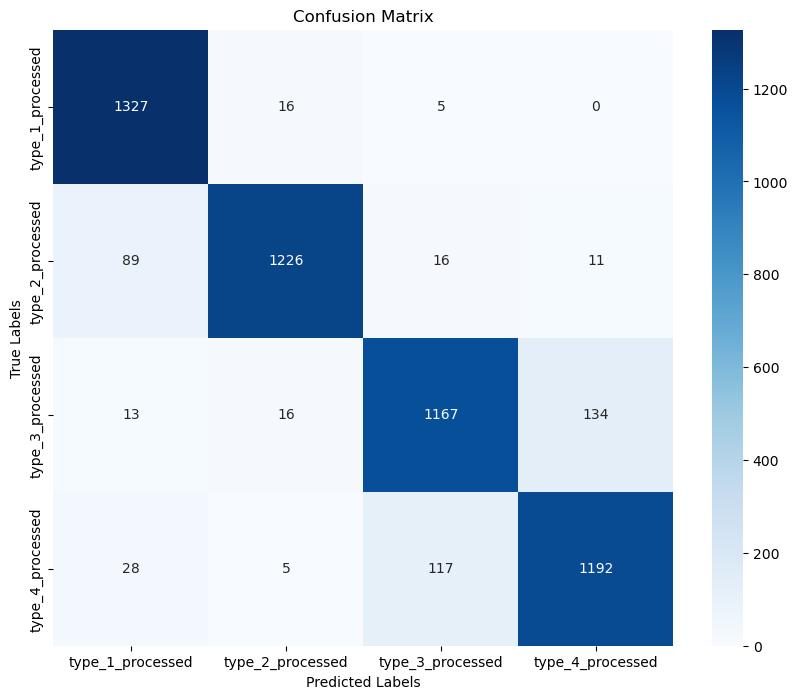

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# First, ensure your test_data does not shuffle if it does so by default
test_data.shuffle = False
test_data.index_array = None

predictions = model.predict(test_data)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = test_data.classes
class_labels = list(test_data.class_indices.keys())

# Generate the confusion matrix
conf_matrix = confusion_matrix(true_classes, predicted_classes)

# Plotting the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')
plt.show()

In [14]:
h = history

#plot the loss value
plt.plot(h.history['loss'], label = 'train_loss')
plt.plot(h.history['val_loss'], label = 'validation_loss')
plt.legend()
plt.show()

#plot the accuracy value
plt.plot(h.history['accuracy'], label = 'train_accuracy')
plt.plot(h.history['val_accuracy'], label = 'validation_accuracy')
plt.legend()
plt.show()

NameError: name 'history' is not defined

In [5]:
categories = list(train_data.class_indices.keys())
print(categories)

['type_1_processed', 'type_2_processed', 'type_3_processed', 'type_4_processed']


- type 1: no mask
- type 2: nose exposed
- type 3: mouth exposed
- type 4: no mask


In [6]:
"""PREDICTIVE SYSTEM"""
import numpy as np
from tensorflow import keras
from PIL import Image

import os
import subprocess
import shutil
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
import shutil
# from google.colab.patches import cv2_imshow
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split


IMG_SHAPE  = 224

model = keras.models.load_model('best_model.keras')


input_image_path = input('Path of the image to be predicted: ')

input_image = Image.open(input_image_path)
input_image = input_image.convert('L')
input_image = input_image.resize((IMG_SHAPE, IMG_SHAPE))
input_image = np.array(input_image)

input_image_scaled = input_image/255.0

input_image_reshaped = np.reshape(input_image_scaled, [1, IMG_SHAPE, IMG_SHAPE, 1]).astype('float32')

input_prediction = model.predict(input_image_reshaped)
print(input_prediction)

input_pred_label = np.argmax(input_prediction)
print("The category detected for this person is ->",categories[input_pred_label])

1/1 [==============================] - 0s 79ms/step
[[6.3349944e-07 2.3968802e-05 9.9997544e-01 1.6881118e-09]]
The category detected for this person is -> type_3_processed
